# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [29]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [6]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.shape

(1000000, 8)

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

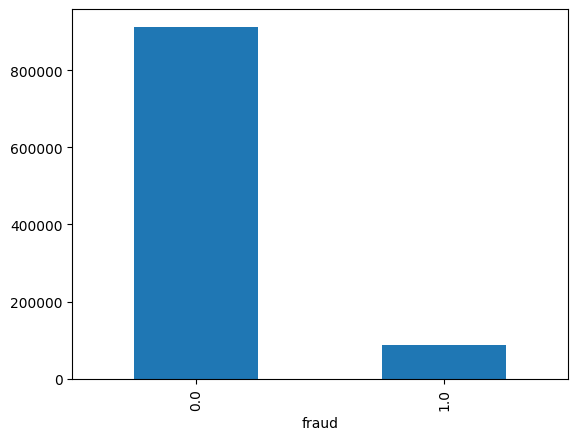

In [7]:
#1.1 What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
fraud_distribution = fraud["fraud"].value_counts()
fraud_distribution.plot(kind="bar")
plt.show()

#we can see that we have approximatelly one million datapoints are legit (not-fraud) and less than 200000 frauds, so yes, we can say that
#distribution of our target is imbalanced.

In [8]:
#train a logistic regression
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
log_reg.score(X_test_scaled, y_test)

0.958448

In [11]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228030
         1.0       0.89      0.60      0.72     21970

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [12]:
#3. Do oversample
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

train["fraud"] = y_train.values

train["fraud"].value_counts()


fraud
0.0    684567
1.0     65433
Name: count, dtype: int64

In [13]:
is_legit = train[train["fraud"] == 0]
is_fraud = train[train["fraud"] == 1]

In [14]:
is_fraud_oversampled = resample(is_fraud, 
                                    replace=True, 
                                    n_samples = len(is_legit),
                                    random_state=0) #because we want the same oputpuit

In [15]:
train_over = pd.concat([is_fraud_oversampled, is_legit])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30347,1.279553,-0.104718,0.069057,0.366345,-0.73381,-0.334702,0.731876,1.0
500933,-0.211898,-0.173693,2.108474,0.366345,-0.73381,-0.334702,0.731876,1.0
489778,-0.391647,-0.155766,1.455154,-2.729668,1.36275,-0.334702,0.731876,1.0
602838,0.092893,2.329151,-0.250681,0.366345,-0.73381,-0.334702,0.731876,1.0
528300,1.492762,0.097740,-0.387301,0.366345,-0.73381,-0.334702,0.731876,1.0
...,...,...,...,...,...,...,...,...
749994,-0.377074,-0.186515,-0.175361,-2.729668,-0.73381,-0.334702,-1.366352,0.0
749995,-0.081183,0.053327,-0.477947,0.366345,1.36275,-0.334702,-1.366352,0.0
749996,13.250130,-0.176910,-0.639079,0.366345,1.36275,-0.334702,0.731876,0.0
749998,0.309864,-0.186144,-0.090556,0.366345,1.36275,-0.334702,0.731876,0.0


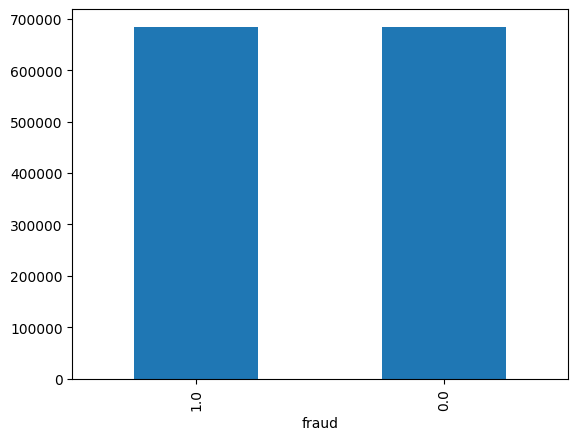

In [16]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [17]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [19]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Volumes/MacintoshHD/Users/veronicalarroy/Desktop/anaconda3/envs/IH_BCN_DAFT/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228030
         1.0       0.57      0.95      0.72     21970

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [23]:
#now, undersample in order to balance
is_legit_undersampled = resample(is_legit, 
                                    replace=False, 
                                    n_samples = len(is_fraud),
                                    random_state=0)

In [24]:
train_under = pd.concat([is_legit_undersampled, is_fraud])

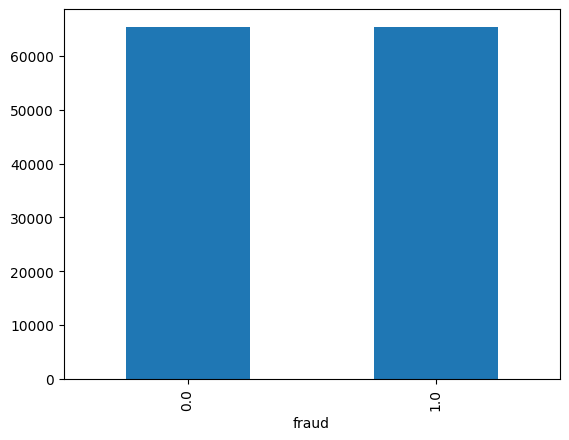

In [25]:
fraud_under_distr_plt = train_under["fraud"].value_counts()
fraud_under_distr_plt.plot(kind="bar")
plt.show()

In [26]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [28]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Volumes/MacintoshHD/Users/veronicalarroy/Desktop/anaconda3/envs/IH_BCN_DAFT/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228030
         1.0       0.57      0.95      0.71     21970

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [30]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [31]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [32]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [33]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228030
         1.0       0.57      0.95      0.72     21970

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
#the model that best performed is the one in which we oversampled the data, because we have good precision for is legit 
#and a relatively good precision for detecting fraud (89%). by the contrary the models in which we undersampled the data or did the SMOT had 
#a lot of false positives.